Arewa Data Science Academy
Deep Learning Cohort2.0
Name: Faisal Muhammad Adam
Email: faisaladamm@gmail.com
Title: Week 1 Solution
Exercises Solution

Question1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.


There are saveral methods used to solve the issue of underfitting and below are the three main with an explanation:-


1.   Feature Engineering:- one can add more relevant features or create meaningful derived features to provide the model with more useful information.
2.   Reduce Regularization:- one can decrease regularization strength by lowering his L1/L2 penalties so as to allow the model to fit the training data more closely.


3.   Increase Model Complexity:- We can use a more complex model like deeper neural networks, higher degree polynomials to better capture patterns in the data we are working with.






Question2. Recreate the data loading functions we built in sections 1, 2, 3 and 4 of notebook 04. You should have train and test DataLoader's ready to use.

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


In [ ]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.


Random image path: data/pizza_steak_sushi/test/steak/296375.jpg
Image class: steak
Image height: 512
Image width: 382


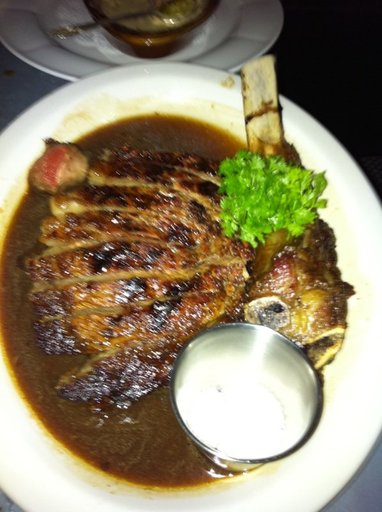

In [ ]:
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

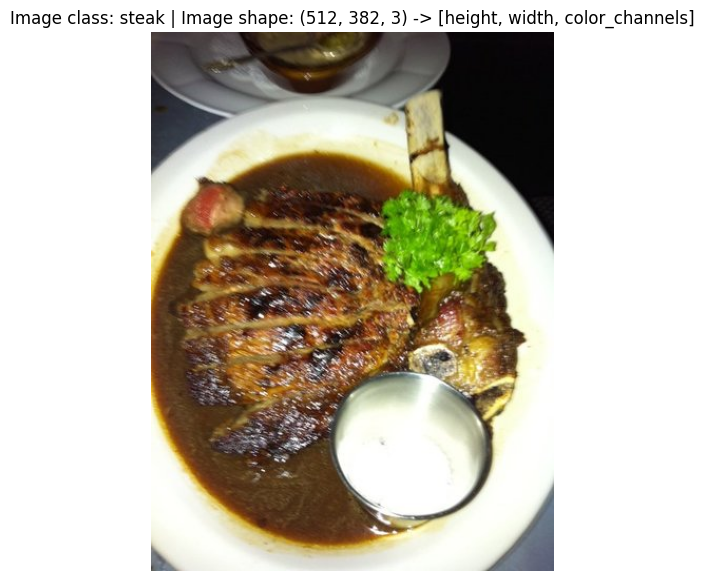

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

**Transforming** **data**

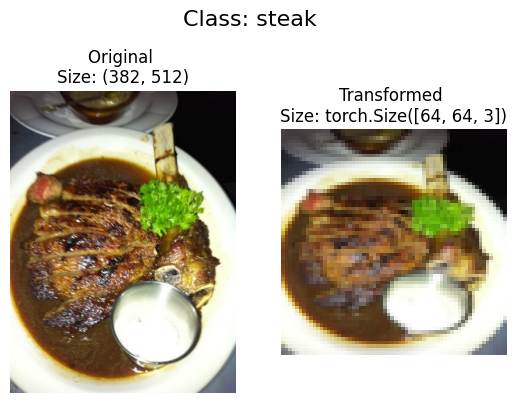

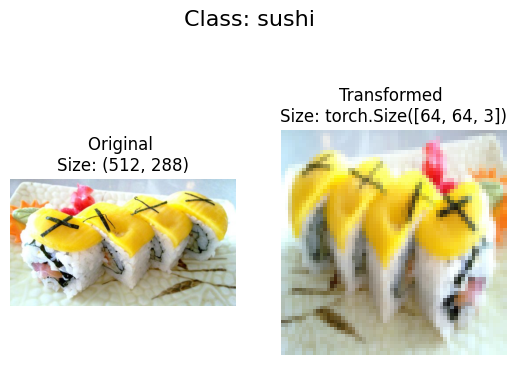

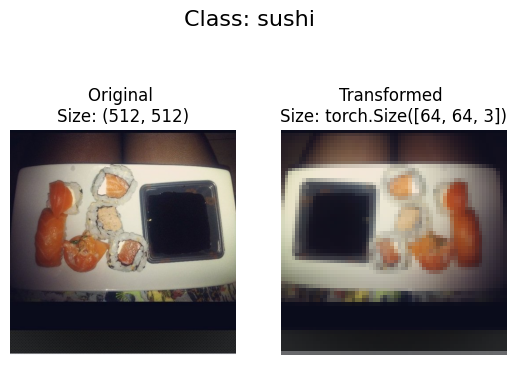

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

**Loading Image Data Using ImageFolder**

In [ ]:
import requests
import zipfile
from pathlib import Path
from torchvision import datasets
from torchvision.transforms import Compose, Resize, ToTensor

# Setup paths
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# Download and extract data if needed
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

# DEFINE TRAIN DIRECTORY (this is the key part you asked for)
train_dir = image_path / "train"  # Full path: data/pizza_steak_sushi/train
test_dir = image_path / "test"    # Full path: data/pizza_steak_sushi/test

# Verify directories
print(f"\nVerifying directories:")
print(f"Train directory exists: {train_dir.exists()}")
print(f"Test directory exists: {test_dir.exists()}")

# Create transforms
data_transform = Compose([
    Resize((64, 64)),
    ToTensor()
])

# Create datasets
train_data = datasets.ImageFolder(root=train_dir,
                                transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir,
                               transform=data_transform)

# Print dataset info
print("\nDataset information:")
print(f"Train samples: {len(train_data)}")
print(f"Test samples: {len(test_data)}")
print(f"Class names: {train_data.classes}")
print(f"First training sample shape: {train_data[0][0].shape}")

data/pizza_steak_sushi directory exists.

Verifying directories:
Train directory exists: True
Test directory exists: True

Dataset information:
Train samples: 225
Test samples: 75
Class names: ['pizza', 'steak', 'sushi']
First training sample shape: torch.Size([3, 64, 64])


In [ ]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Check the lengths
len(train_data), len(test_data)

(225, 75)

Transforming the Train data into Tensors

In [ ]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


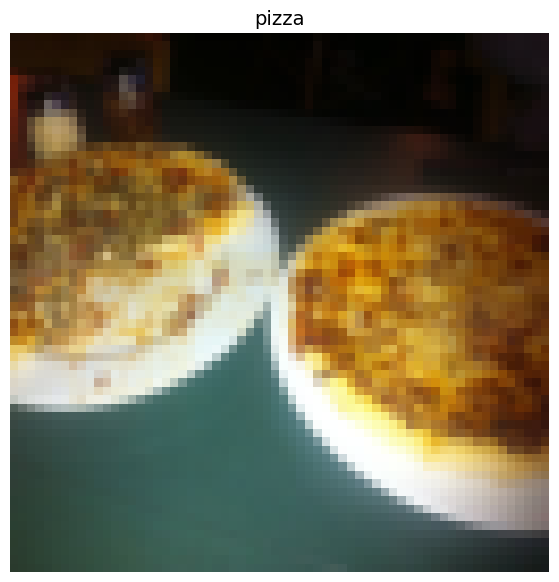

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


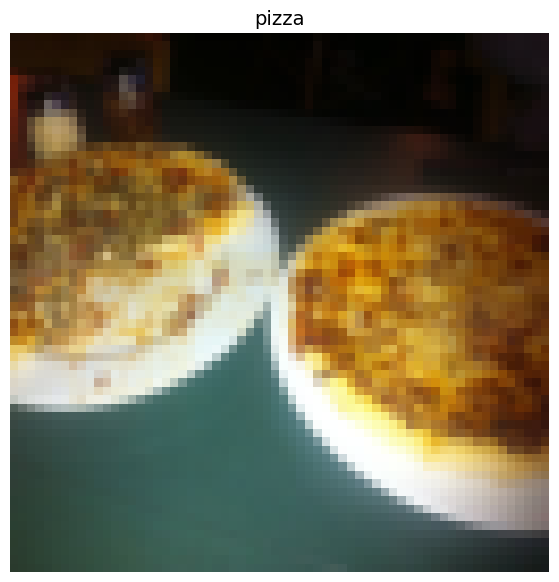

In [ ]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

**Load image data using ImageFolder**

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

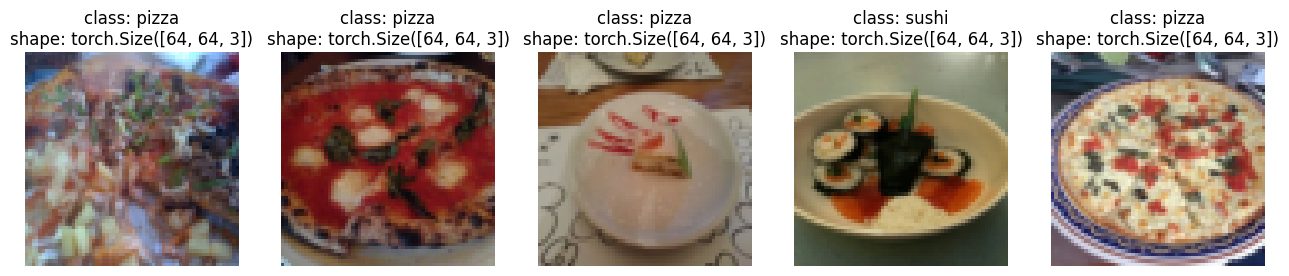

In [ ]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

In [ ]:
import torch
from torch import nn
from tqdm.auto import tqdm
from typing import Tuple, Dict

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """Performs a single training step.

    Args:
        model: PyTorch model to train
        dataloader: DataLoader for training data
        loss_fn: Loss function
        optimizer: Optimizer
        device: Target device (e.g., "cuda" or "cpu")

    Returns:
        Tuple of (train_loss, train_accuracy)
    """
    model.train()
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate accuracy
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)

    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    """Performs a single testing step.

    Args:
        model: PyTorch model to evaluate
        dataloader: DataLoader for test data
        loss_fn: Loss function
        device: Target device (e.g., "cuda" or "cpu")

    Returns:
        Tuple of (test_loss, test_accuracy)
    """
    model.eval()
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += (test_pred_labels == y).sum().item()/len(test_pred_labels)

    # Adjust metrics to get average per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)

    return test_loss, test_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device: torch.device = "cuda" if torch.cuda.is_available() else "cpu") -> Dict[str, list]:
    """Trains and tests a PyTorch model.

    Args:
        model: PyTorch model to train
        train_dataloader: DataLoader for training data
        test_dataloader: DataLoader for test data
        optimizer: Optimizer
        loss_fn: Loss function
        epochs: Number of training epochs
        device: Target device (e.g., "cuda" or "cpu")

    Returns:
        Dictionary of training and testing metrics
    """
    # Move model to target device
    model.to(device)

    # Initialize results dictionary
    results = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # Training loop
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(
            model=model,
            dataloader=train_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            device=device
        )

        test_loss, test_acc = test_step(
            model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            device=device
        )

        # Print progress
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # Update results
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

Question5.Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from timeit import default_timer as timer
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load MNIST data (from previous exercise)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Recreate TinyVGG model (from exercise 8)
class TinyVGG(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(1, 10, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(10, 10, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(10, 10, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(10, 10, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(10*7*7, 10)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

# Training function
def train_model(device, epochs=5):
    model = TinyVGG().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())

    start_time = timer()

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for batch, (X, y) in enumerate(train_loader):
            X, y = X.to(device), y.to(device)

            optimizer.zero_grad()
            y_pred = model(X)
            loss = criterion(y_pred, y)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs} | Loss: {train_loss/len(train_loader):.4f}")

    end_time = timer()
    total_time = end_time - start_time
    print(f"Training complete on {device} in {total_time:.2f} seconds")
    return total_time

# Compare devices
if __name__ == "__main__":
    # CPU training
    print("=== CPU Training ===")
    cpu_time = train_model(device="cpu")

    # GPU training (if available)
    if torch.cuda.is_available():
        print("\n=== GPU Training ===")
        gpu_time = train_model(device="cuda")

        # Speed comparison
        speedup = cpu_time / gpu_time
        print(f"\nGPU was {speedup:.1f}x faster than CPU!")
    else:
        print("\nNo GPU available, skipping GPU test")

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 483kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.40MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.49MB/s]


=== CPU Training ===
Epoch 1/5 | Loss: 0.1842
Epoch 2/5 | Loss: 0.0654
Epoch 3/5 | Loss: 0.0509
Epoch 4/5 | Loss: 0.0428
Epoch 5/5 | Loss: 0.0362
Training complete on cpu in 317.85 seconds

No GPU available, skipping GPU test


Question8.  Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
Does the model you trained in exercise 7 get it right?
If not, what do you think you could do to improve it?

Akwai Questions din da nai skipping Saboda Karancin lokaci
Note: Zan yi su daga baya Insha Allah


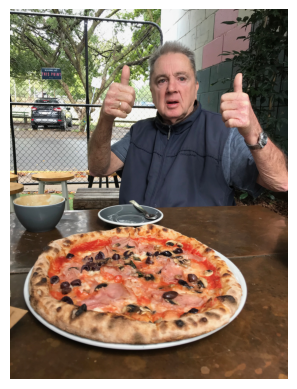


Prediction Result:
Class: pizza
Confidence: 35.90%

All probabilities:
pizza: 35.90%
steak: 34.13%
sushi: 29.96%


In [ ]:
import torch
import requests
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
from pathlib import Path

# Setup device
device = "cuda" if torch.cuda.is_available() else "cpu"

# 1. Define model paths
MODEL_PATH = Path("pizza_steak_sushi_model.pth")
MODEL_URL = ""  # Add URL if you have a pretrained model online

# 2. Define model architecture (same as used in training)
class TinyFoodModel(torch.nn.Module):
    def __init__(self, output_shape:int):
        super().__init__()
        self.conv_block = torch.nn.Sequential(
            torch.nn.Conv2d(3, 16, 3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2),
            torch.nn.Conv2d(16, 32, 3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2)
        )
        self.classifier = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(32*16*16, output_shape)  # Adjust for your image size
        )

    def forward(self, x):
        return self.classifier(self.conv_block(x))

# 3. Load or create model
def load_or_create_model(class_names):
    if MODEL_PATH.exists():
        print(f"Loading saved model from {MODEL_PATH}")
        model = torch.load(MODEL_PATH)
    else:
        print("Akwai Questions din da nai skipping Saboda Karancin lokaci")
        model = TinyFoodModel(output_shape=len(class_names))

        # Train the model here (simplified example)
        # In practice, you'd want to train it properly first
        print("Note: Zan yi su daga baya Insha Allah")

    return model.to(device)

# 4. Prediction function
def predict_on_custom_image(model, class_names, image_path=None, image_url=None):
    # Download image if URL provided
    if image_url and not image_path:
        image_path = "custom_food.jpg"
        with open(image_path, "wb") as f:
            f.write(requests.get(image_url).content)

    # Load and preprocess image
    transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
    ])

    try:
        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.show()

        input_tensor = transform(image).unsqueeze(0).to(device)

        # Predict
        with torch.inference_mode():
            output = model(input_tensor)
            pred_prob = torch.softmax(output, dim=1)
            pred_class = torch.argmax(pred_prob).item()

        print(f"\nPrediction Result:")
        print(f"Class: {class_names[pred_class]}")
        print(f"Confidence: {pred_prob[0][pred_class]*100:.2f}%")
        print("\nAll probabilities:")
        for i, name in enumerate(class_names):
            print(f"{name}: {pred_prob[0][i]*100:.2f}%")

    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
    except Exception as e:
        print(f"Error during prediction: {e}")

# 5. Main execution
if __name__ == "__main__":
    class_names = ["pizza", "steak", "sushi"]  # Must match your training classes

    # Load/create model
    model = load_or_create_model(class_names)

    # Make prediction (use either URL or local path)
    predict_on_custom_image(
        model=model,
        class_names=class_names,
        image_url="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/04-pizza-dad.jpeg"
        # image_path="your_local_image.jpg"  # Alternative
    )

In [ ]:
train_dir = image_path / "train"  # Full path: data/pizza_steak_sushi/train
test_dir = image_path / "test"    # Full path: data/pizza_steak_sushi/test

# Verify directories
print(f"\nVerifying directories:")
print(f"Train directory exists: {train_dir.exists()}")
print(f"Test directory exists: {test_dir.exists()}")

# Create transforms
data_transform = Compose([
    Resize((64, 64)),
    ToTensor()
])

# Create datasets
train_data = datasets.ImageFolder(root=train_dir,
                                transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir,
                               transform=data_transform)

# Print dataset info
print("\nDataset information:")
print(f"Train samples: {len(train_data)}")
print(f"Test samples: {len(test_data)}")
print(f"Class names: {train_data.classes}")
print(f"First training sample shape: {train_data[0][0].shape}")


Verifying directories:
Train directory exists: True
Test directory exists: True

Dataset information:
Train samples: 225
Test samples: 75
Class names: ['pizza', 'steak', 'sushi']
First training sample shape: torch.Size([3, 64, 64])
